Library Setup

In [35]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
# set to show all columns
pd.set_option('display.max_columns', 55)

Import Data

In [36]:
url="https://api.covidtracking.com/v1/states/ny/daily.cs" # API Call for NY data

try:
    s = requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))

    if df.values.size < 3:  # ensure DF has values (may just contain 2 error values)
        raise FileNotFoundError("No data in API")
    else:
        df.to_csv('ny_covid_data.csv', index=False)  # future proof in case api goes down
        df = pd.read_csv(io.StringIO(s.decode('utf-8')))

except FileNotFoundError as fnf_error:
    df = pd.read_csv("ny_covid_data.csv")  # read from most recently fetched data
except: # catch any other unexpected error
    df = pd.read_csv("ny_covid_data.csv")

Data Transformation

In [37]:
# Format dates
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d') 

# Exclude unnecessary attributes
df.drop(['dateChecked'],axis=1,inplace=True) 

# Impute NaN values
df.fillna(value=-1, inplace=True) 

# To check null values in data
df.isnull().sum()

date                           0
state                          0
positive                       0
probableCases                  0
negative                       0
pending                        0
totalTestResultsSource         0
totalTestResults               0
hospitalizedCurrently          0
hospitalizedCumulative         0
inIcuCurrently                 0
inIcuCumulative                0
onVentilatorCurrently          0
onVentilatorCumulative         0
recovered                      0
lastUpdateEt                   0
dateModified                   0
checkTimeEt                    0
death                          0
hospitalized                   0
hospitalizedDischarged         0
totalTestsViral                0
positiveTestsViral             0
negativeTestsViral             0
positiveCasesViral             0
deathConfirmed                 0
deathProbable                  0
totalTestEncountersViral       0
totalTestsPeopleViral          0
totalTestsAntibody             0
positiveTe

In [38]:
# apply filter on date
df = df[df['date'] <= '2020-06-30']


# view data
df.tail(n = 5)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
364,2020-03-06,NY,25,-1.0,-1.0,236.0,totalTestEncountersViral,122,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,122,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,22,0,261,92,25,-1.0,0,0,9e99ccc04e6d33397cc412ee1b0fbecddbaeecd8,0,0,0,0,0,-1.0
365,2020-03-05,NY,3,-1.0,-1.0,24.0,totalTestEncountersViral,30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,2,0,27,20,3,-1.0,0,0,04e82e80db72556a73999ead493c993e90b8969e,0,0,0,0,0,-1.0
366,2020-03-04,NY,1,-1.0,-1.0,24.0,totalTestEncountersViral,10,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,10,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,0,0,25,9,1,-1.0,0,0,3feb3bdb879194f81d11c8bbf994d8e3ea2a5252,0,0,0,0,0,-1.0
367,2020-03-03,NY,1,-1.0,-1.0,-1.0,totalTestEncountersViral,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,1,0,1,1,1,-1.0,0,0,9e3daed71a696c0c3fa30150ee6423a0a94de8f5,0,0,0,0,0,-1.0
368,2020-03-02,NY,0,-1.0,-1.0,-1.0,totalTestEncountersViral,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,0,0,0,0,0,-1.0,0,0,b348e3592c0b30cb944b37ddbc88044ceeeadfc9,0,0,0,0,0,-1.0


View Data

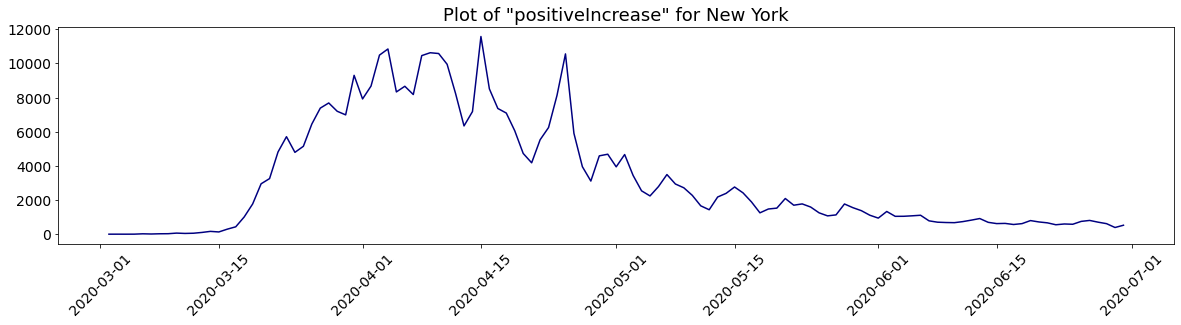

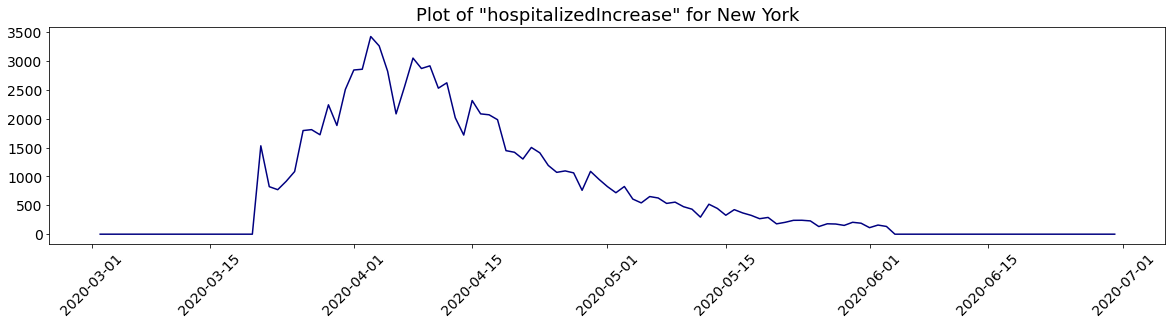

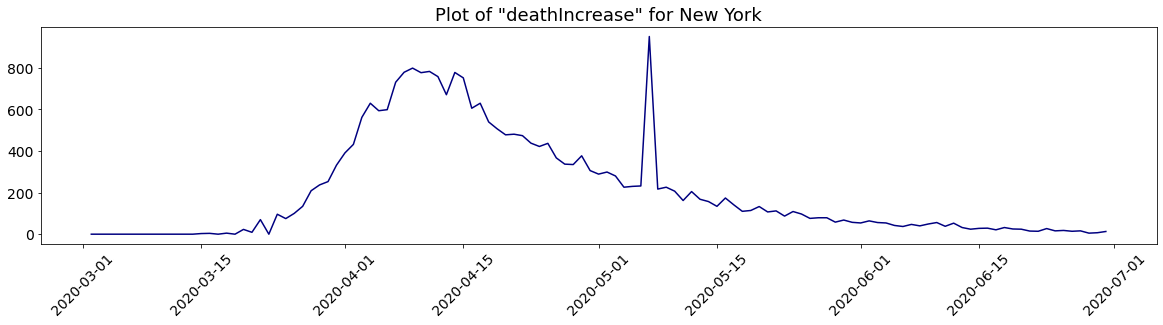

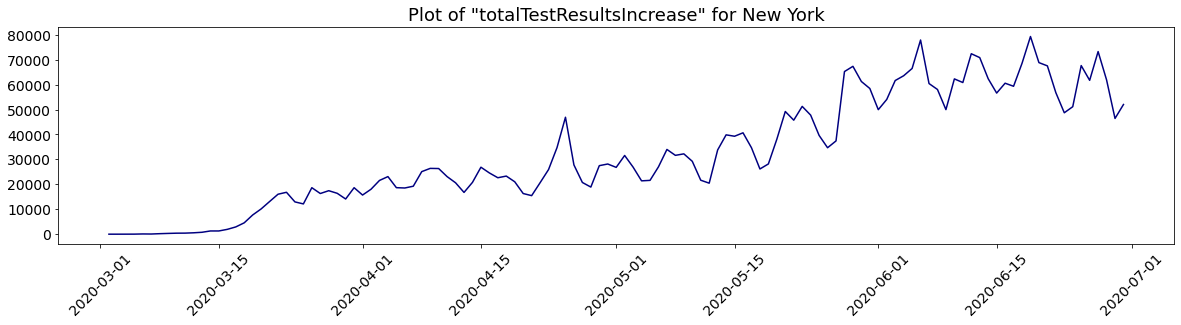

In [39]:
def plot_var(var='positiveIncrease'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"

    y = df[var]
    x = df['date']
    plt.figure(figsize=(20,4))
    plt.title("Plot of \"{}\" for New York".format(var),fontsize=18)
    plt.plot(x,y,color='navy')
    plt.grid(False)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

plot_var('positiveIncrease')

plot_var('hospitalizedIncrease')

plot_var('deathIncrease')

plot_var('totalTestResultsIncrease')

In [40]:
pd.set_option('display.max_columns', 56)

# 7 days moving average for positiveIncrease
df.sort_values(by=['date'], inplace=True, ascending=True)

# reset index
df.reset_index(level=0, inplace=True)

def add_sevenday_newCases(df):

    df['sevenDayAvg_newCases'] = 'NA'

    for i in range(0, len(df['positiveIncrease'])):
        if i < 7:
            df['sevenDayAvg_newCases'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['positiveIncrease'][i-y])
            df['sevenDayAvg_newCases'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for hospitalization
def add_sevenday_hospitalize(df):

    df['sevenDayAvg_hospitalize'] = 'NA'

    for i in range(0, len(df['hospitalizedIncrease'])):
        if i < 7:
            df['sevenDayAvg_hospitalize'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['hospitalizedIncrease'][i-y])
            df['sevenDayAvg_hospitalize'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for Death
def add_sevenday_death(df):

    df['sevenDayAvg_death'] = 'NA'

    for i in range(0, len(df['deathIncrease'])):
        if i < 7:
            df['sevenDayAvg_death'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['deathIncrease'][i-y])
            df['sevenDayAvg_death'][i] = round(sum(weekly) / 7)
    return df

# 7 days moving average for Test Result
def add_sevenday_testResult(df):

    df['sevenDayAvg_testResult'] = 'NA'

    for i in range(0, len(df['totalTestResultsIncrease'])):
        if i < 7:
            df['sevenDayAvg_testResult'][i] = 0
        else :
            weekly = []
            for y in range(0,7):
                weekly.append(df['totalTestResultsIncrease'][i-y])
            df['sevenDayAvg_testResult'][i] = round(sum(weekly) / 7)
    return df



In [41]:
add_sevenday_newCases(df)
add_sevenday_hospitalize(df)
add_sevenday_death(df)
add_sevenday_testResult(df)

,index,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,...,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,sevenDayAvg_newCases,sevenDayAvg_hospitalize,sevenDayAvg_death,sevenDayAvg_testResult
0,368,2020-03-02,NY,0,-1.0,-1.0,-1.0,totalTestEncountersViral,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,0,0,0,0,0,-1.0,0,0,b348e3592c0b30cb944b37ddbc88044ceeeadfc9,0,0,0,0,0,-1.0,0,0,0,0
1,367,2020-03-03,NY,1,-1.0,-1.0,-1.0,totalTestEncountersViral,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,1,0,1,1,1,-1.0,0,0,9e3daed71a696c0c3fa30150ee6423a0a94de8f5,0,0,0,0,0,-1.0,0,0,0,0
2,366,2020-03-04,NY,1,-1.0,-1.0,24.0,totalTestEncountersViral,10,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,0,0,25,9,1,-1.0,0,0,3feb3bdb879194f81d11c8bbf994d8e3ea2a5252,0,0,0,0,0,-1.0,0,0,0,0
3,365,2020-03-05,NY,3,-1.0,-1.0,24.0,totalTestEncountersViral,30,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,2,0,27,20,3,-1.0,0,0,04e82e80db72556a73999ead493c993e90b8969e,0,0,0,0,0,-1.0,0,0,0,0
4,364,2020-03-06,NY,25,-1.0,-1.0,236.0,totalTestEncountersViral,122,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,22,0,261,92,25,-1.0,0,0,9e99ccc04e6d33397cc412ee1b0fbecddbaeecd8,0,0,0,0,0,-1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,252,2020-06-26,NY,391220,-1.0,-1.0,-1.0,totalTestEncountersViral,3681317,951.0,89995.0,244.0,-1.0,167.0,-1.0,-1.0,6/25/2020 23:59,2020-06-25T23:59:00Z,06/25 19:59,24814.0,89995.0,70010.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,805,0,391220,61723,391220,-1.0,14,0,0415ca28a21a379fdec8a1a34f7bf57b53a7b511,0,0,0,0,0,-1.0,666,0,18,60336
117,251,2020-06-27,NY,391923,-1.0,-1.0,-1.0,totalTestEncountersViral,3754579,908.0,89995.0,230.0,-1.0,167.0,-1.0,-1.0,6/26/2020 23:59,2020-06-26T23:59:00Z,06/26 19:59,24830.0,89995.0,70010.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,703,0,391923,73262,391923,-1.0,16,0,49d082c4525827acb47baf3905154b915f46e62d,0,0,0,0,0,-1.0,664,0,17,60969
118,250,2020-06-28,NY,392539,-1.0,-1.0,-1.0,totalTestEncountersViral,3816485,869.0,89995.0,229.0,-1.0,167.0,-1.0,-1.0,6/27/2020 23:59,2020-06-27T23:59:00Z,06/27 19:59,24835.0,89995.0,70010.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,616,0,392539,61906,392539,-1.0,5,0,c6b2f6c762a5771b69bd2b3a1799ddd8dc4733e2,0,0,0,0,0,-1.0,658,0,16,60167
119,249,2020-06-29,NY,392930,-1.0,-1.0,-1.0,totalTestEncountersViral,3862913,853.0,89995.0,216.0,-1.0,136.0,-1.0,-1.0,6/28/2020 23:59,2020-06-28T23:59:00Z,06/28 19:59,24842.0,89995.0,70435.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36,391,0,392930,46428,392930,-1.0,7,0,51bb925b

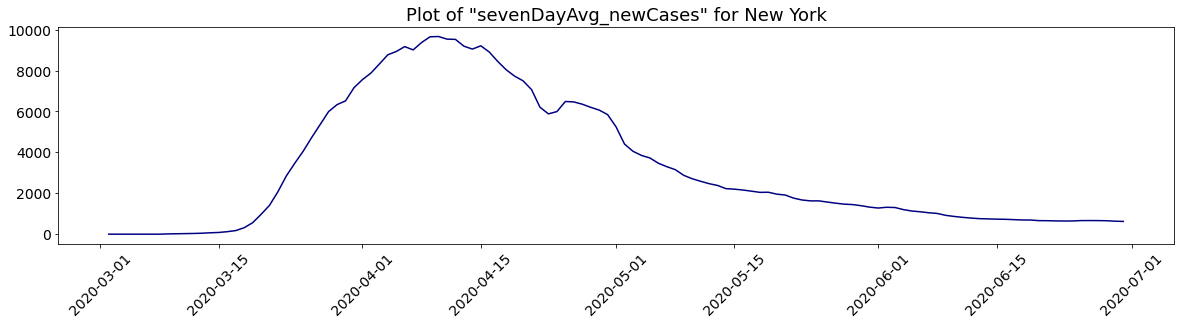

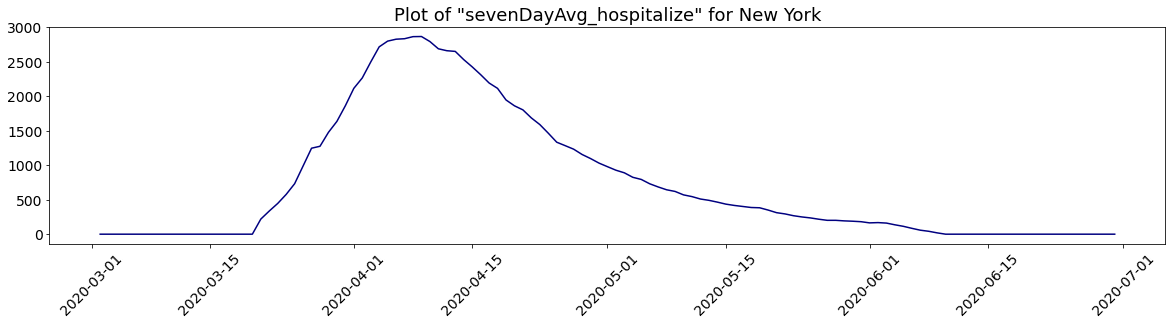

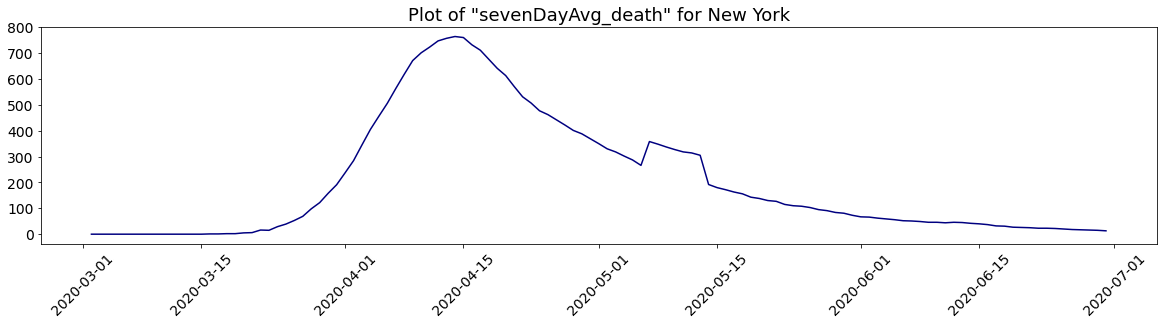

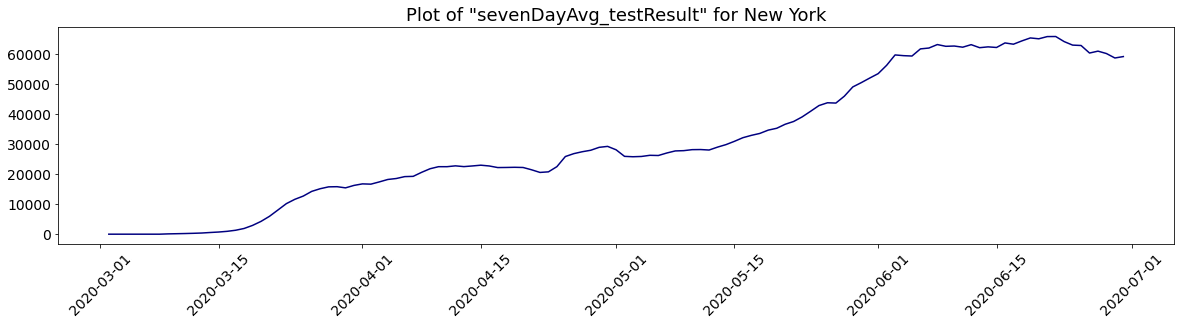

In [42]:
plot_var('sevenDayAvg_newCases')
plot_var('sevenDayAvg_hospitalize')
plot_var('sevenDayAvg_death')
plot_var('sevenDayAvg_testResult')

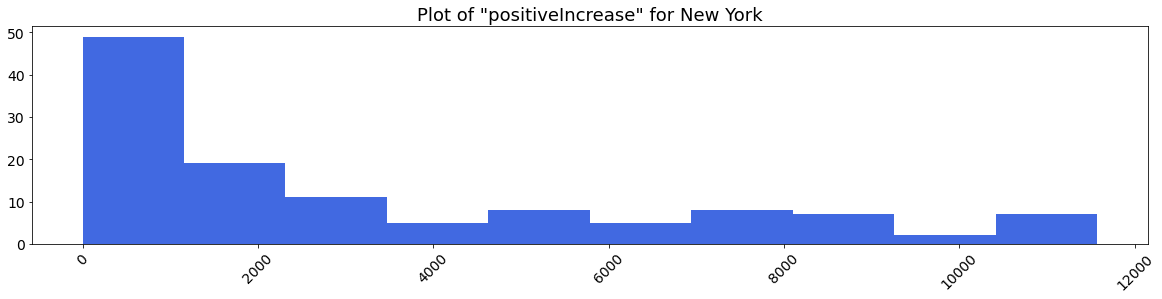

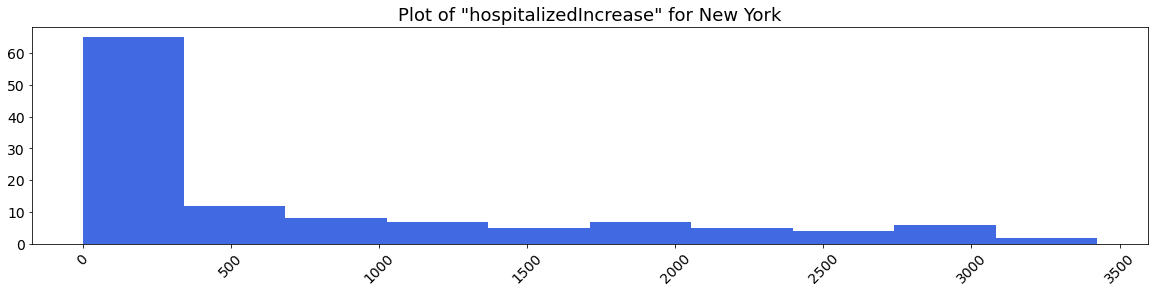

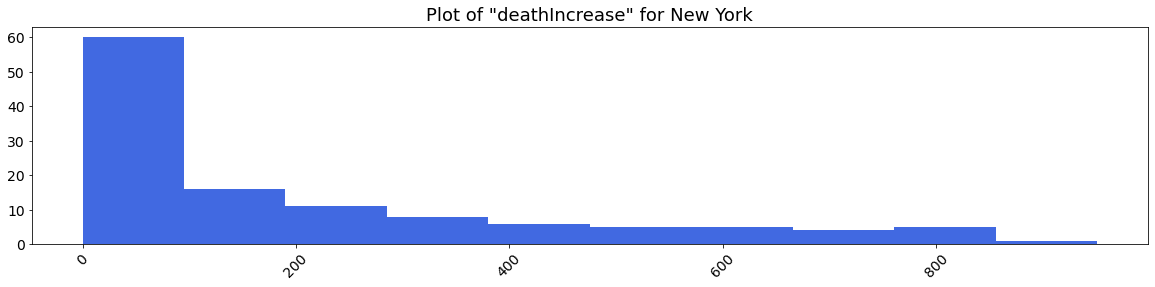

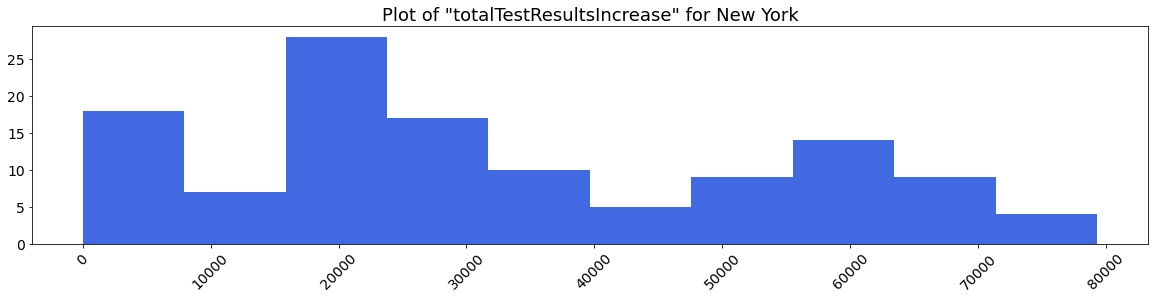

In [43]:
def plot_hist(var='positiveIncrease'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"

    y = df[var]
    plt.figure(figsize=(20,4))
    plt.title("Plot of \"{}\" for New York".format(var),fontsize=18)
    plt.hist(y,color='royalblue')
    plt.grid(False)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

plot_hist('positiveIncrease')

plot_hist('hospitalizedIncrease')

plot_hist('deathIncrease')

plot_hist('totalTestResultsIncrease')